## Project: Weather prediction on time series data
1. Import libraries
2. Download dataset
3. Read the data
4. Limit dataset
5. Investigate data
6. Remove data
7. Add periodic time intervals
8. Splitting data
9. Normalize data
10. Create datasets
11. Create model
12. Trasin model
13. Predic data
14. Plot the result
15. (Optional): Calculate the correlation

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

%matplotlib inline

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

### 

In [3]:
data = pd.read_csv(csv_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [4]:
data["Date Time"]

0         01.01.2009 00:10:00
1         01.01.2009 00:20:00
2         01.01.2009 00:30:00
3         01.01.2009 00:40:00
4         01.01.2009 00:50:00
                 ...         
420546    31.12.2016 23:20:00
420547    31.12.2016 23:30:00
420548    31.12.2016 23:40:00
420549    31.12.2016 23:50:00
420550    01.01.2017 00:00:00
Name: Date Time, Length: 420551, dtype: object

In [5]:
data = pd.read_csv(csv_path, parse_dates=True, index_col=0)
# data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1 MB


The dataset has the metrics for every 10 minutes.
Limit it to only once per hour.

In [6]:
data.index

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00',
               '2009-01-01 00:30:00', '2009-01-01 00:40:00',
               '2009-01-01 00:50:00', '2009-01-01 01:00:00',
               '2009-01-01 01:10:00', '2009-01-01 01:20:00',
               '2009-01-01 01:30:00', '2009-01-01 01:40:00',
               ...
               '2016-12-31 22:30:00', '2016-12-31 22:40:00',
               '2016-12-31 22:50:00', '2016-12-31 23:00:00',
               '2016-12-31 23:10:00', '2016-12-31 23:20:00',
               '2016-12-31 23:30:00', '2016-12-31 23:40:00',
               '2016-12-31 23:50:00', '2017-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Date Time', length=420551, freq=None)

In [7]:
data.index[0:2] # 00:10 -> 00:20 ten minutes

DatetimeIndex(['2009-01-01 00:10:00', '2009-01-01 00:20:00'], dtype='datetime64[ns]', name='Date Time', freq=None)

In [8]:
hourly_data = data[5::6] 
hourly_data.index[0:2] # 1:00 -> 2:00 one hour

DatetimeIndex(['2009-01-01 01:00:00', '2009-01-01 02:00:00'], dtype='datetime64[ns]', name='Date Time', freq=None)

Use correlation matrix to inspect what columns are correlated and not.

In [9]:
hourly_data.corr()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
p (mbar),1.000000,-0.045296,-0.124643,-0.066698,-0.018363,-0.031455,-0.054353,-0.003283,-0.069749,-0.069792,0.307583,-0.005740,-0.007360,-0.063678
T (degC),-0.045296,1.000000,0.996826,0.895706,-0.572593,0.951080,0.867691,0.761672,0.866770,0.867195,-0.963404,-0.004923,-0.003884,0.041577
Tpot (K),-0.124643,0.996826,1.000000,0.894909,-0.567306,0.947259,0.866228,0.756886,0.866553,0.866978,-0.981342,-0.004426,-0.003263,0.046465
Tdew (degC),-0.066698,0.895706,0.894909,1.000000,-0.156834,0.799182,0.968361,0.435689,0.967614,0.968061,-0.885231,-0.008581,-0.009693,0.052507
rh (%),-0.018363,-0.572593,-0.567306,-0.156834,1.000000,-0.616019,-0.151704,-0.843768,-0.151049,-0.151181,0.514461,-0.004227,-0.008641,-0.017297
VPmax (mbar),-0.031455,0.951080,0.947259,0.799182,-0.616019,1.000000,0.824758,0.875639,0.824349,0.824386,-0.901488,-0.004358,-0.003154,-0.006787
VPact (mbar),-0.054353,0.867691,0.866228,0.968361,-0.151704,0.824758,1.000000,0.449080,0.999851,0.999856,-0.850271,-0.009390,-0.010883,0.020988
VPdef (mbar),-0.003283,0.761672,0.756886,0.435689,-0.843768,0.875639,0.449080,1.000000,0.448561,0.448615,-0.698195,0.001138,0.004315,-0.028644
sh (g/kg),-0.069749,0.866770,0.866553,0.967614,-0.151049,0.824349,0.999851,0.448561,1.000000,0.999997,-0.853354,-0.009270,-0.010736,0.021961
H2OC (mmol/mol),-0.069792,0.867195,0.866978,0.968061,-0.151181,0.824386,0.999856,0.448615,0.999997,1.000000,-0.853801,-0.009272,-0.010736,0.022195


In [10]:
help(pd.DataFrame.corr)

Help on function corr in module pandas.core.frame:

corr(self, method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1) -> 'DataFrame'
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and Spearman correlation.
    
    Returns
 

### Transform datatime index to sinus and cosinus curves based on day and year.

In [11]:
# datetime index
timestamps_s = hourly_data.index
timestamps_s

DatetimeIndex(['2009-01-01 01:00:00', '2009-01-01 02:00:00',
               '2009-01-01 03:00:00', '2009-01-01 04:00:00',
               '2009-01-01 05:00:00', '2009-01-01 06:00:00',
               '2009-01-01 07:00:00', '2009-01-01 08:00:00',
               '2009-01-01 09:00:00', '2009-01-01 10:00:00',
               ...
               '2016-12-31 14:10:00', '2016-12-31 15:10:00',
               '2016-12-31 16:10:00', '2016-12-31 17:10:00',
               '2016-12-31 18:10:00', '2016-12-31 19:10:00',
               '2016-12-31 20:10:00', '2016-12-31 21:10:00',
               '2016-12-31 22:10:00', '2016-12-31 23:10:00'],
              dtype='datetime64[ns]', name='Date Time', length=70091, freq=None)

In [12]:
help(pd.Timestamp.timestamp)

Help on method_descriptor:

timestamp(...)
    Return POSIX timestamp as float.
    
    Examples
    --------
    >>> ts = pd.Timestamp('2020-03-14T15:32:52.192548')
    >>> ts.timestamp()
    1584199972.192548



POSIX timestamp is a system for describing a point in time, defined as the number of seconds that have elapsed since January 1, 1970(midnight UTC/GMT) not counting leap seconds.

In [13]:
# Make each date index into seconds.
timestamps_s = timestamps_s.map(pd.Timestamp.timestamp)
timestamps_s

Float64Index([1230771600.0, 1230775200.0, 1230778800.0, 1230782400.0,
              1230786000.0, 1230789600.0, 1230793200.0, 1230796800.0,
              1230800400.0, 1230804000.0,
              ...
              1483193400.0, 1483197000.0, 1483200600.0, 1483204200.0,
              1483207800.0, 1483211400.0, 1483215000.0, 1483218600.0,
              1483222200.0, 1483225800.0],
             dtype='float64', name='Date Time', length=70091)

In [14]:
# Define day, year as seoncds.

day = 24 * 60 * 60 # 24 hours * 60 minutes * 60 seconds = 1 day in seconds
year = 365.2425 * day 

#### Add periodic time intervals

In [15]:
# second of our hourly measured data (linear)
timestamps_s

Float64Index([1230771600.0, 1230775200.0, 1230778800.0, 1230782400.0,
              1230786000.0, 1230789600.0, 1230793200.0, 1230796800.0,
              1230800400.0, 1230804000.0,
              ...
              1483193400.0, 1483197000.0, 1483200600.0, 1483204200.0,
              1483207800.0, 1483211400.0, 1483215000.0, 1483218600.0,
              1483222200.0, 1483225800.0],
             dtype='float64', name='Date Time', length=70091)

<AxesSubplot:>

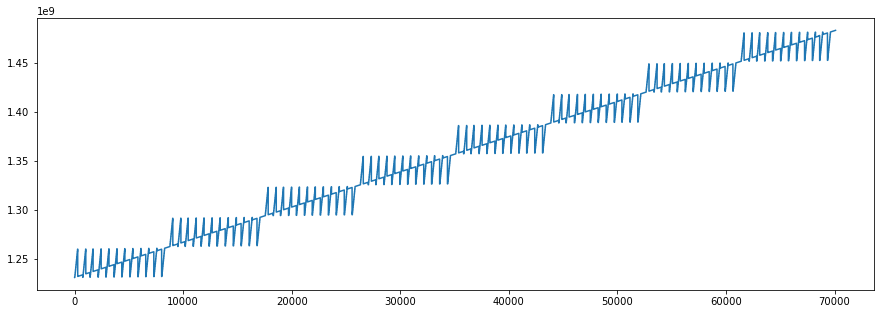

In [16]:
pd.Series(timestamps_s).plot(figsize=(15,5))

In [17]:
np.sin(timestamps_s * 2 * np.pi)

Float64Index([-4.6049487014912036e-07, -4.4152767145515467e-07,
               -4.225604727611888e-07, -4.0359327406722275e-07,
              -3.8462607537325664e-07,  -3.656588766792903e-07,
              -3.4669167798532387e-07,  -3.277244792913573e-07,
              -3.0875728059739063e-07, -2.8979008190342383e-07,
              ...
               4.3740084249732325e-08,   6.270728294369994e-08,
                8.167448163766753e-08,  1.0064168033163509e-07,
                1.196088790256026e-07,   1.385760777195701e-07,
               1.5754327641353754e-07,   1.765104751075049e-07,
                1.954776738014722e-07,  2.1444487249543947e-07],
             dtype='float64', name='Date Time', length=70091)

<AxesSubplot:>

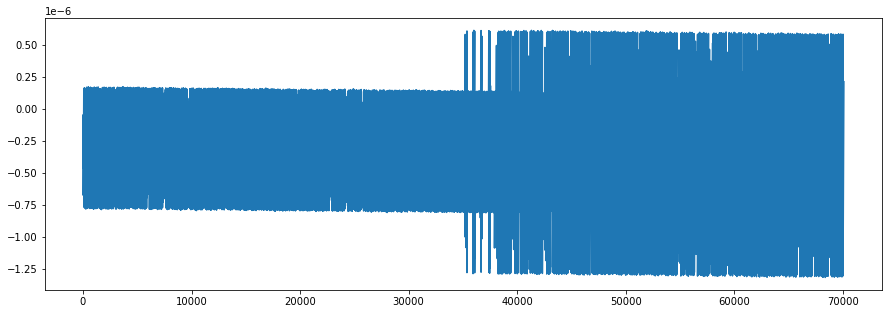

In [18]:
pd.Series(np.sin(timestamps_s * 2 * np.pi)).plot(figsize=(15,5))

In [19]:
# 이 숫자들의 의미가 무엇인가? 
np.sin(timestamps_s * 2 * np.pi / day)

Float64Index([  0.2588190450957067,   0.4999999999893199,    0.707106781184385,
                0.8660254037802706,    0.965925826289311,                  1.0,
                0.9659258262915575,   0.8660254037846106,   0.7071067811905226,
                0.4999999999968369,
              ...
               -0.5372996083519418,  -0.7372773368106581,  -0.8870108331761496,
               -0.9762960071209694,  -0.9990482215818792,  -0.9537169507455858,
               -0.8433914458110024,  -0.6755902076169673, -0.46174861322838034,
              -0.21643961393593228],
             dtype='float64', name='Date Time', length=70091)

<AxesSubplot:>

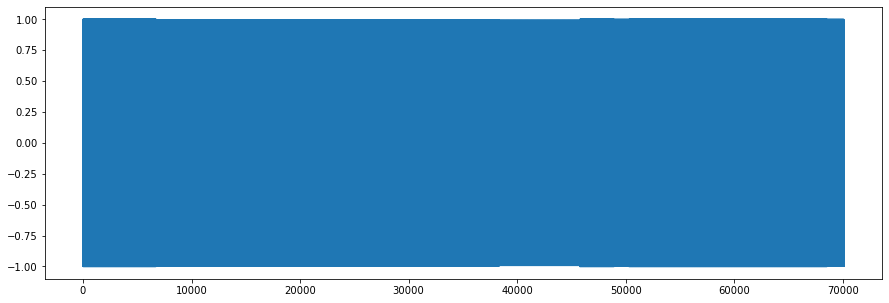

In [20]:
pd.Series(np.sin(timestamps_s * 2 * np.pi / day)).plot(figsize=(15,5))

In [21]:
# Making the curves of the data instead of having seconds which would be linear.

# Add Day_sin, Day_cos column to hourly_data
hourly_data["Day_sin"] = np.sin(timestamps_s * 2 * np.pi / day)
hourly_data["Day_cos"] = np.cos(timestamps_s* 2 * np.pi / day )

# Add Year_sin, Year_cos column to hourly data
hourly_data["Year_sin"] = np.sin(timestamps_s * 2 * np.pi / year)
hourly_data["Year_cos"] = np.cos(timestamps_s * 2 * np.pi / year)

C:\Users\USER\AppData\Local\Temp\ipykernel_31324\3263412347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_data["Day_sin"] = np.sin(timestamps_s * 2 * np.pi / day)
C:\Users\USER\AppData\Local\Temp\ipykernel_31324\3263412347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_data["Day_cos"] = np.cos(timestamps_s* 2 * np.pi / day )
C:\Users\USER\AppData\Local\Temp\ipykernel_31324\3263412347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

<AxesSubplot:>

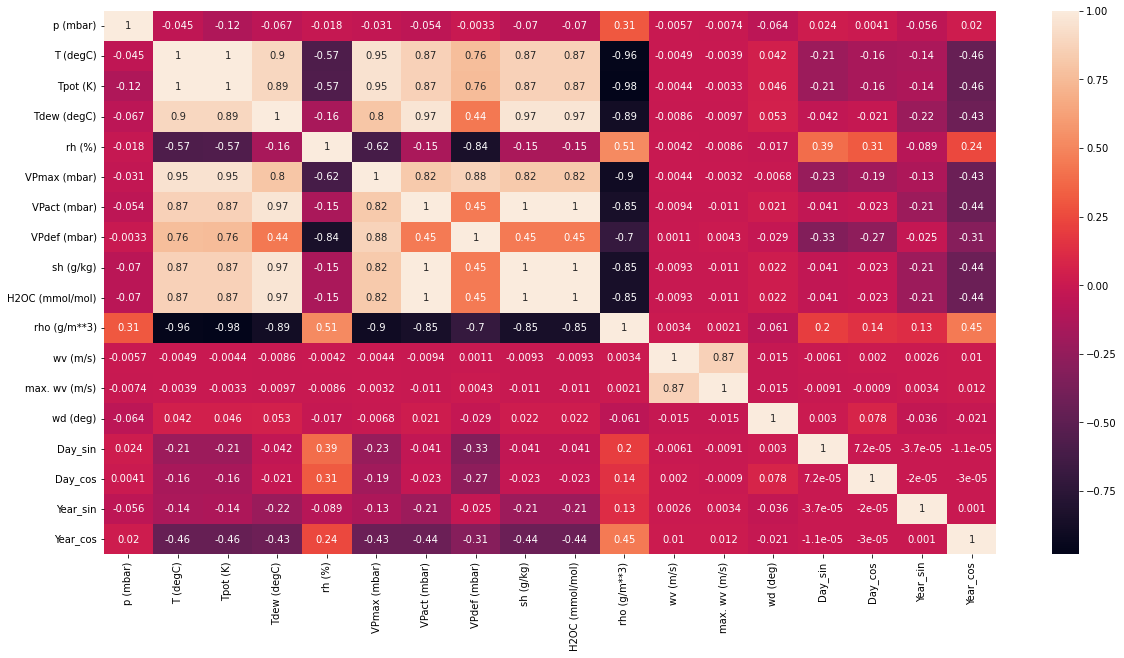

In [22]:
# [rh, Day_sin], [rh, Day_cos]
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(hourly_data.corr(), annot=True)

Split into 70% for training, 20% for validation, and 10% for testing set.

In [23]:
len(hourly_data)

70091

In [24]:
n = len(hourly_data)
train = hourly_data[0 : int(n * .7)]
valid = hourly_data[int(n * .7) : int(n * .9)]
test = hourly_data[int(n * .9) :]

Normalize data based on training set.

In [25]:
train_mean = train.mean()
train_std = train.std()

normalized_train = train - train_mean / train_std
normalized_valid = valid - train_mean / train_std
normalized_test = test - train_mean / train_std

Create datasets: train, valid, and test
- returns (x, y.T)
- x : input
- y : output 
- (i features, j hours, k samples)

In [26]:
def create_dataset(df, input_width=24, offset=0, predict_column="T (degC)"):
    x = []
    y = []
    
    data_x = df.to_numpy()
    data_y = df[predict_column].to_numpy()
    
    for i in range(input_width, len(data_x) - offset):
        x.append(data_x[i - input_width : i, :])
        y.append(data_y[i + offset])
        
    x = np.array(x)
    y = np.array(y)
    
    # Reshape y from a row to a column.
    return x, y.reshape(-1, 1)

In [27]:
train_ds = create_dataset(train)
valid_ds = create_dataset(valid)
test_ds = create_dataset(test)

train dataset
- 18 features = original 15 features - 1 * Date Time + 1 * Day_ sin + 1 * Day_cos + 1 * Year_sin + 1 * Year_cos
- 24 hours : window size of time series forecasting model

In [28]:
# 18 features, 24hours, 49039 samples
train_ds[0].shape

(49039, 24, 18)

In [29]:
# input_shape
train_ds[0].shape[1:]

(24, 18)

In [30]:
# targets for 49039 samples
train_ds[1].shape

(49039, 1)

valid dataset

In [31]:
valid_ds[0].shape, valid_ds[1].shape

((13994, 24, 18), (13994, 1))

test dataset

In [32]:
test_ds[0].shape, test_ds[1].shape

((6986, 24, 18), (6986, 1))

Create a model 

In [33]:
model = models.Sequential()
model.add(layers.LSTM(32,
                      return_sequences=True,
                     input_shape=train_ds[0].shape[1:]))
model.add(layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 32)            6528      
                                                                 
 dense (Dense)               (None, 24, 1)             33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


Train model

In [34]:
# compile the model
model.compile(optimizer="adam", 
             loss="mean_squared_error",
             metrics=["accuracy"])

In [35]:
# Fit the model
model.fit(train_ds[0],
         train_ds[1],
         validation_data=(valid_ds[0], valid_ds[1]),
         epochs=5)

Epoch 1/5
1533/1533 [==============================] - 13s 6ms/step - loss: 87.4012 - accuracy: 3.2627e-04 - val_loss: 58.8643 - val_accuracy: 6.4313e-04
Epoch 2/5
1533/1533 [==============================] - 9s 6ms/step - loss: 74.9307 - accuracy: 3.2627e-04 - val_loss: 58.7353 - val_accuracy: 6.4313e-04
Epoch 3/5
1533/1533 [==============================] - 9s 6ms/step - loss: 74.9262 - accuracy: 3.2627e-04 - val_loss: 58.7311 - val_accuracy: 6.4313e-04
Epoch 4/5
1533/1533 [==============================] - 9s 6ms/step - loss: 74.9255 - accuracy: 3.2627e-04 - val_loss: 58.6683 - val_accuracy: 6.4313e-04
Epoch 5/5
1533/1533 [==============================] - 9s 6ms/step - loss: 74.9302 - accuracy: 3.2627e-04 - val_loss: 58.7719 - val_accuracy: 6.4313e-04


Predict Temperature "T (degC)"

In [36]:
x, y =  test_ds
y_pred = model.predict(x)

219/219 [==============================] - 1s 2ms/step


In [37]:
# 24 values of each one of the prediction
# because 24 시간 multivariate에 multioutput tsf 모델이기 때문
y_pred.shape

(6986, 24, 1)

Plot the result

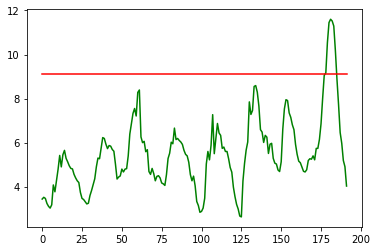

In [38]:
# Plot the window of the datas.
fig, ax = plt.subplots()

i = 150

# red : predicted
# green : actual

ax.plot(y[i : i + 96 * 2, 0], c='g')
ax.plot(y_pred[i : i + 96 * 2, -1, 0], c='r')
plt.show()